In [19]:
# Library pengolahan data
import pandas as pd
import numpy as np

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [20]:
#read data
data = pd.read_csv("insurance.csv")

#add new columnn BMI category
bmi_condition = [data['bmi'] < 18.5, data['bmi'] < 25, data['bmi'] < 30, data['bmi'] >= 30]
category = ["underweight", "healthy", "overweight", "obese"]

data['kategori'] = np.select(bmi_condition, category)
data.head()

,age,sex,bmi,children,smoker,region,charges,kategori
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [21]:
#distribusi peluang banyak data dari tiap region
region_total = data['region'].count()
region = data.groupby(['region']).agg({'region':'count'})

region['percentage'] = 100 * region['region'] / region_total #persentase
region = region.round()


region

,region,percentage
region,,
northeast,324,24.0
northwest,325,24.0
southeast,364,27.0
southwest,325,24.0


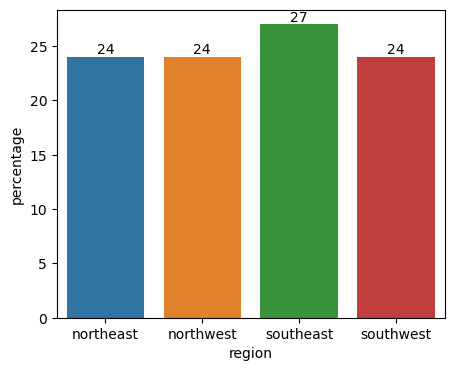

In [22]:
#visualisasi proprosi data tiap region
plt.figure(figsize=(5,4))
ax = sns.barplot(x=region.index,
           y="percentage",
           data=region)
for i in ax.containers:
    ax.bar_label(i,)

In [23]:
#rata2 tagihan laki laki vs perempuan
data.groupby(['sex']).agg({'charges':['mean']}).round()

,charges
,mean
sex,
female,12570.0
male,13957.0


In [24]:
#Persen lebih mahal tagihan pria dibandingkan wanita
selisih = 13957-12570

persen = selisih/12570 * 100
print(f'Rata-rata tagihan laki-laki lebih mahal {persen:.1f}% dari perempuan')

Rata-rata tagihan laki-laki lebih mahal 11.0% dari perempuan


In [25]:
# Proporsi perokok dan non-perokok
smoker = data.groupby(['smoker']).agg({'smoker':['count']}).round(1)
smoker['percentage'] = 100 * smoker['smoker'] / 1338
smoker = smoker.round(1)

smoker

,smoker,percentage
,count,
smoker,,
no,1064,79.5
yes,274,20.5


[Text(0, 0, '1064'), Text(0, 0, '274')]

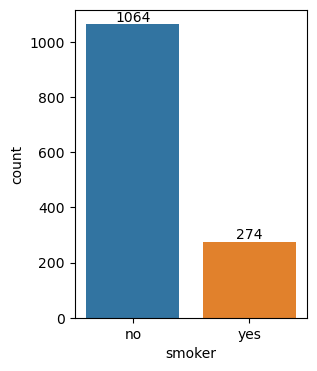

In [26]:
#visualisasi proporsi perokok
plt.figure(figsize=(3,4))
ax = sns.countplot(x = 'smoker', data = data, order=data['smoker'].value_counts().index)

smoke_values = data['smoker'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=smoke_values)

In [31]:
#proporsi perokok vs non perokok berdasarkan region
smoker_region = data.groupby(['region','smoker']).agg(smoker_count=('smoker', 'size')
        )

smoker_region['percentage'] = smoker_region.groupby('region')['smoker_count'].transform(lambda x: x/x.sum()*100)

smoker_region.round(1)

smoker_count  percentage
region    smoker                          
northeast no               257        79.3
          yes               67        20.7
northwest no               267        82.2
          yes               58        17.8
southeast no               273        75.0
          yes               91        25.0
southwest no               267        82.2
          yes               58        17.8

<Figure size 300x400 with 0 Axes>

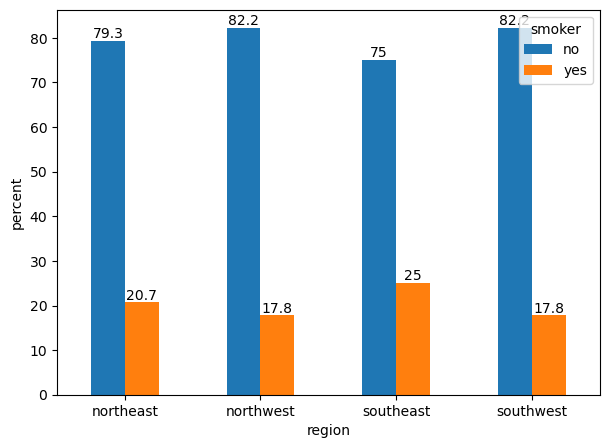

In [32]:
#visualisasi perokok/non-perokok berdasarkan region
plt.figure(figsize=(3,4))
df_pivot = smoker_region.pivot_table( 
                          values="percentage", 
                          index="region", 
                          columns="smoker", 
                          aggfunc=np.mean).round(1)

ax = df_pivot.plot(kind='bar', figsize=(7,5), rot = 0)
plt.ylabel("percent")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
#hitung jumlah smoker/non-smoker berdasarkan gender
data.groupby(['sex','smoker']).agg({'smoker':['count']}).round(2)

smoker
               count
sex    smoker       
female no        547
       yes       115
male   no        517
       yes       159

In [ ]:
#peluang pria atau wanita, diketahui dia perokok
smoker_total = 159+115

female = 547+115
female_smoker = 115

male = 517+159
male_smoker = 159

f_given_smoke = female_smoker / smoker_total 
m_given_smoke = male_smoker / smoker_total 

print(f'Peluang seseorang tersebut Perempuan, diketahui dia perokok: {f_given_smoke:,.2f}')
print(f'Peluang seseorang tersebut Laki-laki, diketahui dia perokok: {m_given_smoke:,.2f}')

Peluang seseorang tersebut Perempuan, diketahui dia perokok: 0.42
Peluang seseorang tersebut Laki-laki, diketahui dia perokok: 0.58


In [ ]:
#peluang pria atau wanita, diketahui dia perokok
smoker_total = 159+115

female = 547+115
female_smoker = 115

male = 517+159
male_smoker = 159

f_given_smoke = female_smoker / smoker_total 
m_given_smoke = male_smoker / smoker_total 

print(f'Peluang seseorang tersebut Perempuan, diketahui dia perokok: {f_given_smoke:,.2f}')
print(f'Peluang seseorang tersebut Laki-laki, diketahui dia perokok: {m_given_smoke:,.2f}')

Peluang seseorang tersebut Perempuan, diketahui dia perokok: 0.42
Peluang seseorang tersebut Laki-laki, diketahui dia perokok: 0.58


In [ ]:
# Proporsi perokok laki2 vs perempuan
smoker_gender = data[data.smoker=='yes'].groupby(['sex'])['smoker'].agg('count').round(1)
smoker_gender = smoker_gender.to_frame()
smoker_gender['percentage'] = 100 * smoker_gender['smoker'] / 274
smoker_gender = smoker_gender.round(1)

smoker_gender


,smoker,percentage
sex,,
female,115,42.0
male,159,58.0
